In [ ]:
# Makes us able to collect data from Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 2.x

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import layers
from keras.models import Sequential


In [ ]:
batch_size = 16
img_height = 37
img_width = 30

data_dir = '/content/drive/MyDrive/cropped_suit_sorted/'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 1066 files belonging to 4 classes.
Using 853 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1066 files belonging to 4 classes.
Using 213 files for validation.


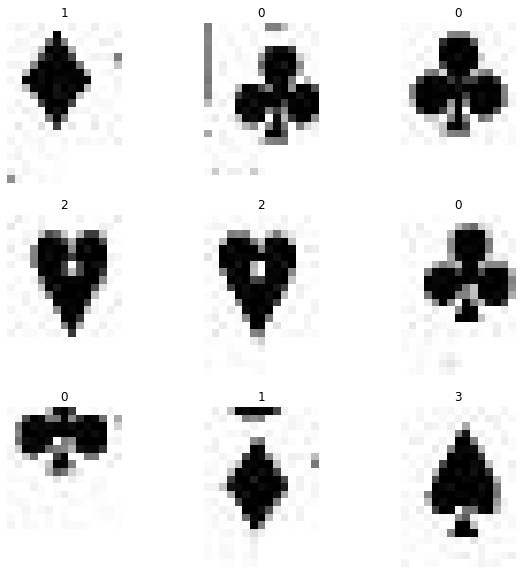

In [ ]:
#See if images are there.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

In [ ]:
class_names = ['clubs', 'diamonds', 'hearts', 'spades']

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(16, 21, 15, 3)
(16,)


In [ ]:
autotune = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=autotune)
val_ds = val_ds.cache().prefetch(buffer_size=autotune)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height,
                                  img_width,
                                  3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 21, 15, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 15, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 7, 16)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 7, 32)         4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 3, 64)         

In [ ]:
epochs = 4
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/4
54/54 [==============================] - 4s 32ms/step - loss: 0.8861 - accuracy: 0.6870 - val_loss: 0.5208 - val_accuracy: 0.7700
Epoch 2/4
54/54 [==============================] - 1s 16ms/step - loss: 0.3119 - accuracy: 0.9004 - val_loss: 0.1727 - val_accuracy: 0.9484
Epoch 3/4
54/54 [==============================] - 1s 16ms/step - loss: 0.1436 - accuracy: 0.9613 - val_loss: 0.1280 - val_accuracy: 0.9765
Epoch 4/4
54/54 [==============================] - 1s 19ms/step - loss: 0.0955 - accuracy: 0.9754 - val_loss: 0.0905 - val_accuracy: 0.9671


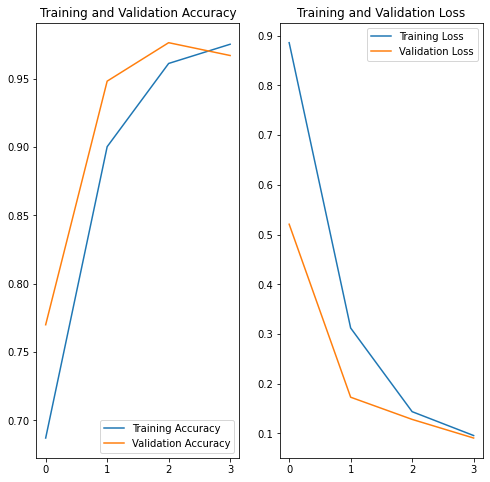

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:

files_to_guess = ['/content/drive/MyDrive/test_images/clubs.jpg',
                  '/content/drive/MyDrive/test_images/diamonds.jpg',
                  '/content/drive/MyDrive/test_images/hearts.jpg',
                  '/content/drive/MyDrive/test_images/spades.jpg']

for path in files_to_guess:
  img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print(path)
  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )


/content/drive/MyDrive/test_images/clubs.jpg
This image most likely belongs to clubs with a 99.89 percent confidence.
/content/drive/MyDrive/test_images/diamonds.jpg
This image most likely belongs to diamonds with a 95.85 percent confidence.
/content/drive/MyDrive/test_images/hearts.jpg
This image most likely belongs to hearts with a 93.09 percent confidence.
/content/drive/MyDrive/test_images/spades.jpg
This image most likely belongs to spades with a 96.96 percent confidence.


In [ ]:
model.save(r"/content/drive/MyDrive/CDIO F22/ML modeller/suit_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CDIO F22/ML modeller/suit_model/assets
